In [82]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
carDataSet = pd.read_csv('drive/MyDrive/Colab Notebooks/car_dataset.csv')
x = carDataSet.iloc[: , 3:-1].values
y = carDataSet.iloc[:,-1].values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')

imputer.fit(x[:,7:12])
x[:, 7:12]=imputer.transform(x[:, 7:12])
imputer.fit(x[:,16:23])
x[:, 16:23]=imputer.transform(x[:, 16:23])

carDataSet.iloc[: , 3:-1]=x
carDataSet.drop(['Normalize Losses'],axis=1,inplace=True)

Handled the Missing values using simple imputer's  mean strategy


In [85]:
carDataSet.head()

,car_ID,Symboling,Brand,fuelType,aspiration,numOfDoors,bodyStyle,driveWheels,engineLocation,wheelBase,length,width,height,curbWeight,engineType,numOfCylinders,engineSize,fuelSystem,bore,stroke,compressionRatio,horsepower,peakRpm,cityMpg,highwayMpg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450


In [86]:
carDataSet.shape

(205, 26)

In [87]:
carDataSet.describe()

,car_ID,Symboling,wheelBase,length,width,height,curbWeight,engineSize,bore,stroke,compressionRatio,horsepower,peakRpm,cityMpg,highwayMpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13327.55122
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,8119.80474
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.00000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.00000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.00000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.00000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.00000


In [88]:
carDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   Symboling         205 non-null    int64  
 2   Brand             205 non-null    object 
 3   fuelType          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   numOfDoors        205 non-null    object 
 6   bodyStyle         205 non-null    object 
 7   driveWheels       205 non-null    object 
 8   engineLocation    205 non-null    object 
 9   wheelBase         205 non-null    float64
 10  length            205 non-null    float64
 11  width             205 non-null    float64
 12  height            205 non-null    float64
 13  curbWeight        205 non-null    float64
 14  engineType        205 non-null    object 
 15  numOfCylinders    205 non-null    object 
 16  engineSize        205 non-null    int64  
 1

In [89]:
carDataSet.Brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [90]:
carDataSet.loc[carDataSet.duplicated()]

,car_ID,Symboling,Brand,fuelType,aspiration,numOfDoors,bodyStyle,driveWheels,engineLocation,wheelBase,length,width,height,curbWeight,engineType,numOfCylinders,engineSize,fuelSystem,bore,stroke,compressionRatio,horsepower,peakRpm,cityMpg,highwayMpg,price


### Visualizing the data


From here we are comparing the other features with price from the data set

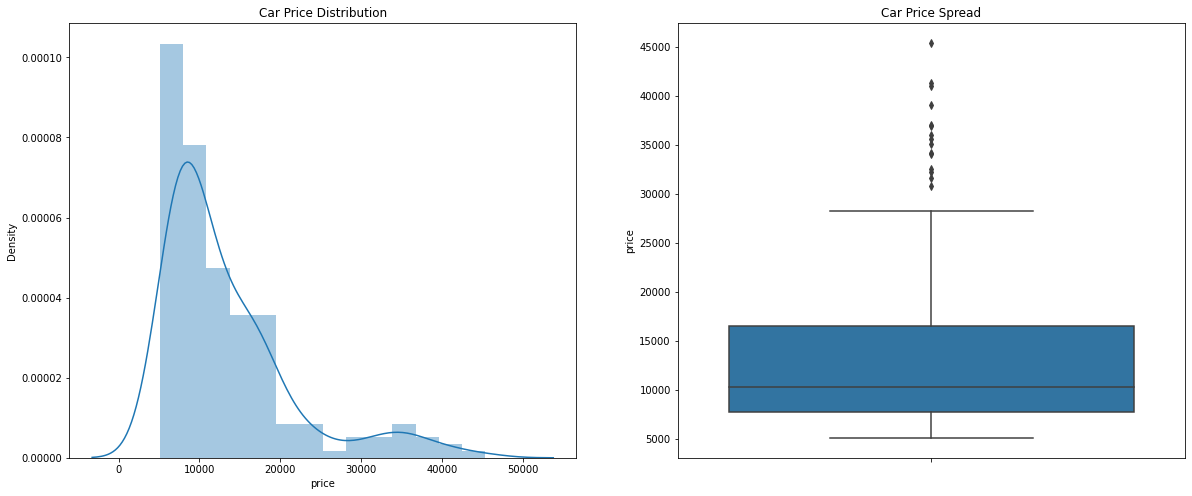

In [91]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution')
sns.distplot(carDataSet.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=carDataSet.price)

plt.show()

In [92]:
print(carDataSet.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.00000
mean     13327.55122
std       8119.80474
min       5118.00000
25%       7775.00000
50%      10295.00000
75%      16503.00000
85%      18740.00000
90%      22775.00000
100%     45400.00000
max      45400.00000
Name: price, dtype: float64


#### Visualising Categorical Data

    - Brand
    - fuelType
    - engineType
    - numOfDoors
    - bodyStyle
    - fuelSystem
    - numOfCylinders
    - driveWheels

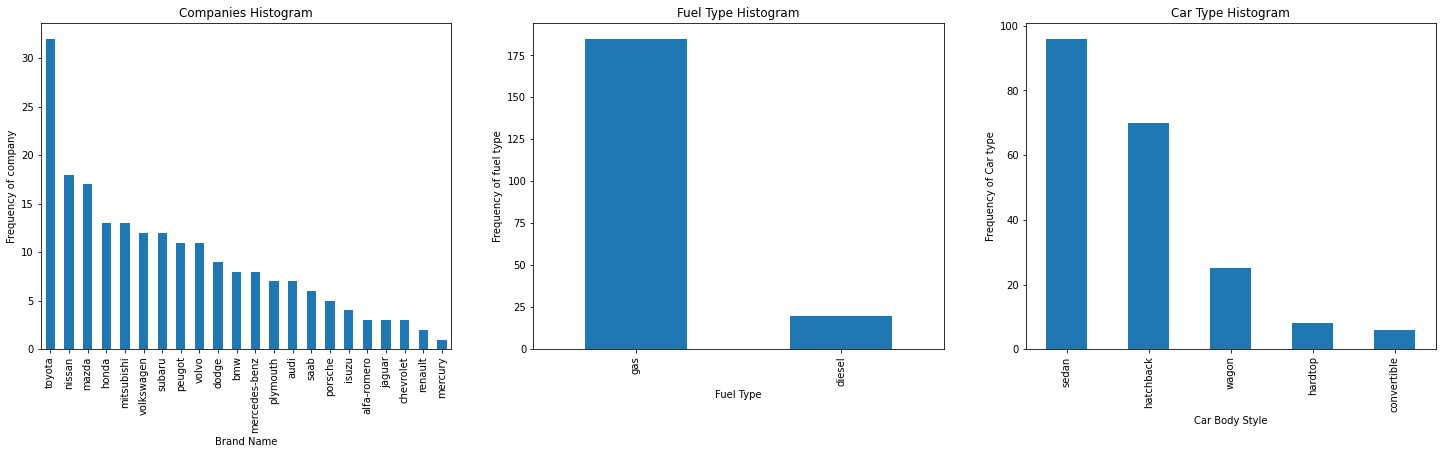

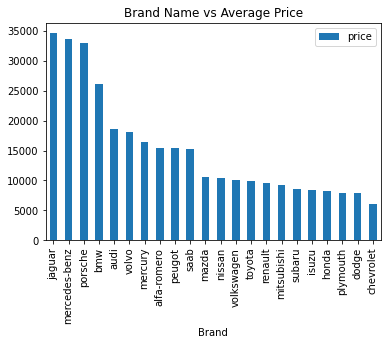

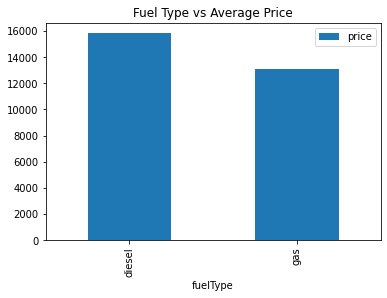

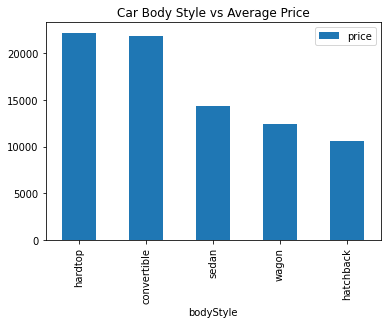

In [93]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = carDataSet.Brand.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Brand Name', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = carDataSet.fuelType.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = carDataSet.bodyStyle.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Body Style', ylabel='Frequency of Car type')


df = pd.DataFrame(carDataSet.groupby(['Brand'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Brand Name vs Average Price')
plt.show()

df = pd.DataFrame(carDataSet.groupby(['fuelType'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(carDataSet.groupby(['bodyStyle'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Body Style vs Average Price')

plt.show()

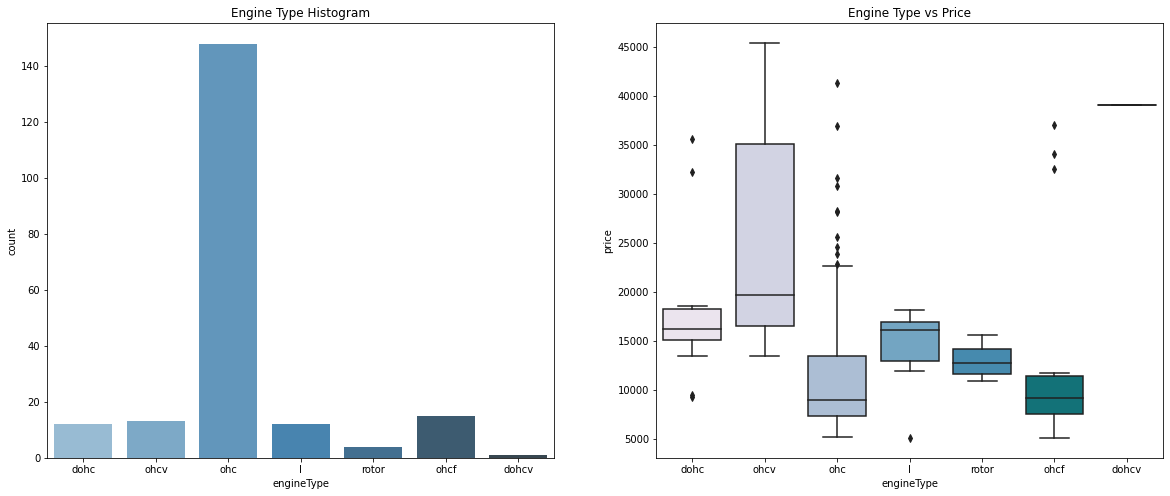

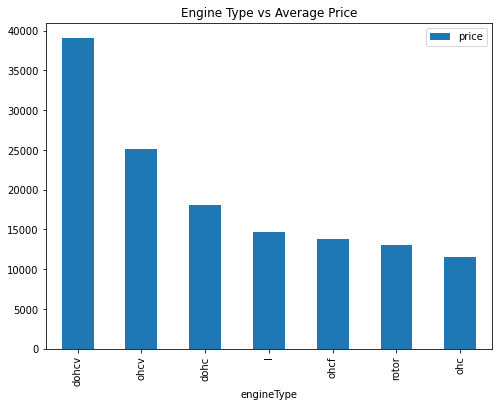

In [94]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(carDataSet.engineType, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=carDataSet.engineType, y=carDataSet.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(carDataSet.groupby(['engineType'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()


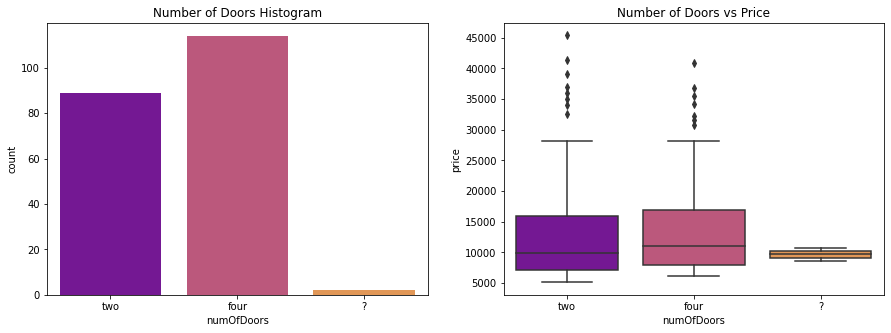

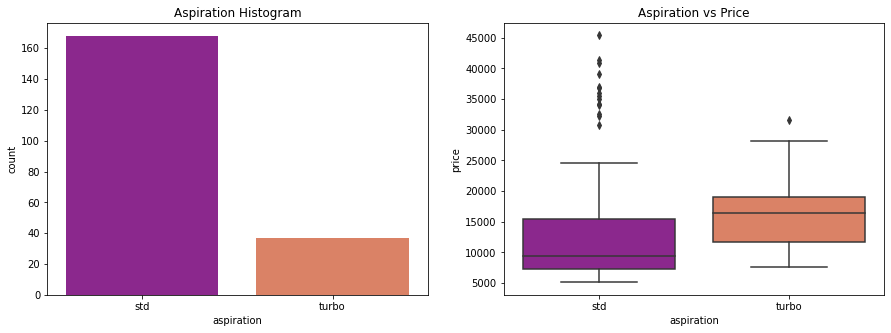

In [95]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Number of Doors Histogram')
sns.countplot(carDataSet.numOfDoors, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Number of Doors vs Price')
sns.boxplot(x=carDataSet.numOfDoors, y=carDataSet.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(carDataSet.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=carDataSet.aspiration, y=carDataSet.price, palette=("plasma"))

plt.show()


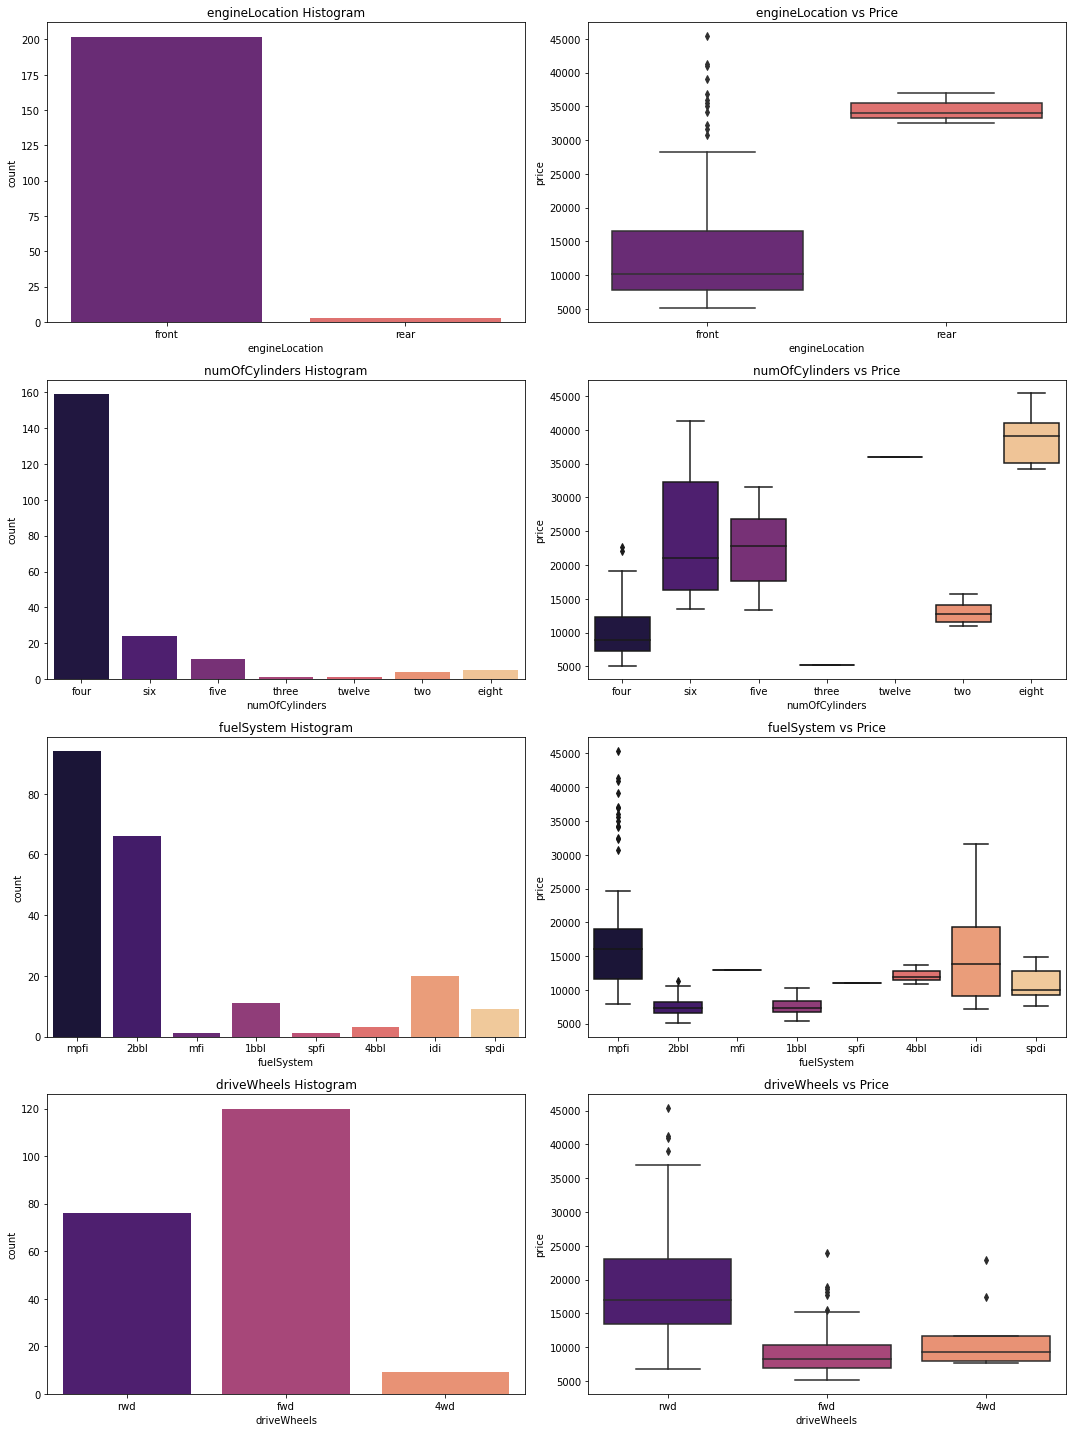

In [96]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(carDataSet[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=carDataSet[x], y=carDataSet.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('engineLocation', 1)
plot_count('numOfCylinders', 3)
plot_count('fuelSystem', 5)
plot_count('driveWheels', 7)

plt.tight_layout()

We have very few data points for enginelocation categories to make an inference. The most common number of cylinders is four, six, and five. However, eight cylinders are the most expensive. mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. However, there are not enough data for other categories to derive any meaningful conclusions and there is a very significant difference in drivewheel categories. The majority of high-end cars have a right-hand drivewheel.


#### Visualising numerical data

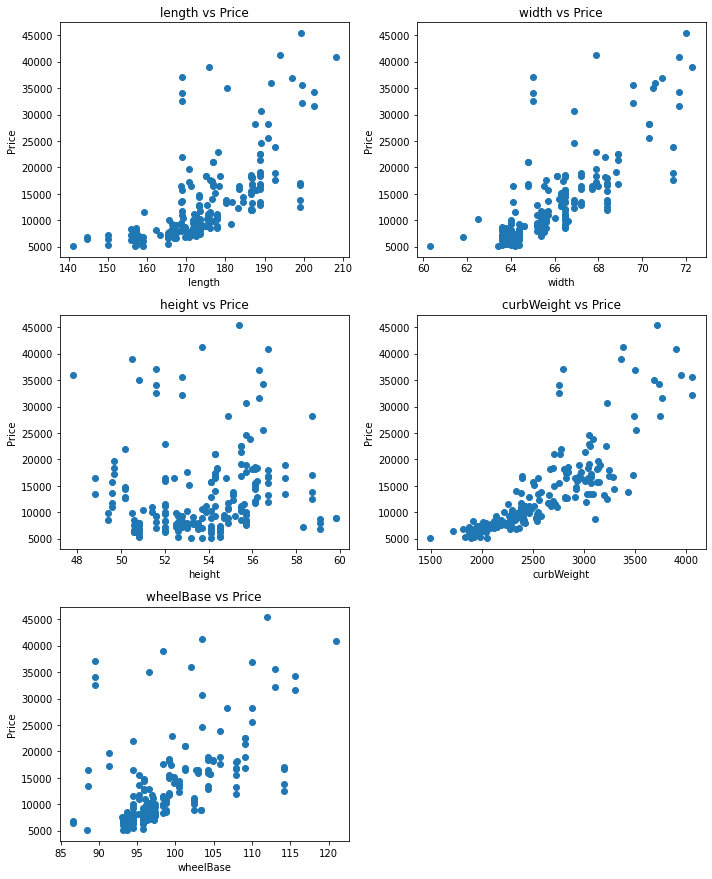

In [97]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(carDataSet[x],carDataSet['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('length', 1)
scatter('width', 2)
scatter('height', 3)
scatter('curbWeight', 4)
scatter('wheelBase', 5)

plt.tight_layout()

Curbweight, carwidth, and carlength are positively correlated with price. However, carheight shows no significant relationship with price.


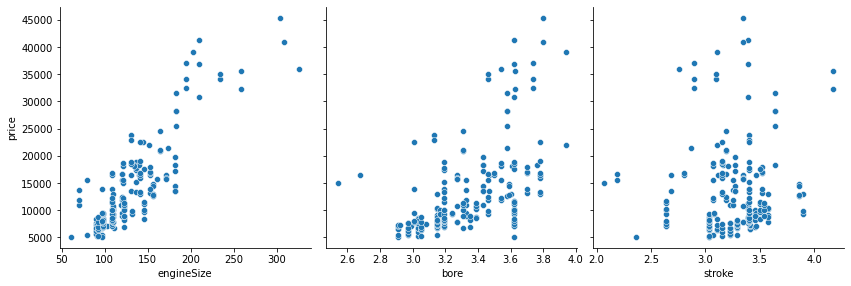

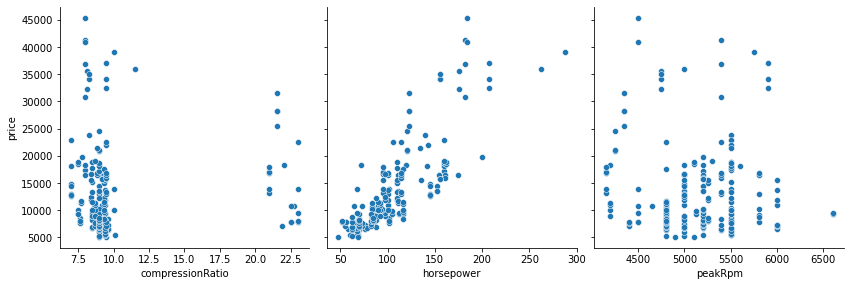

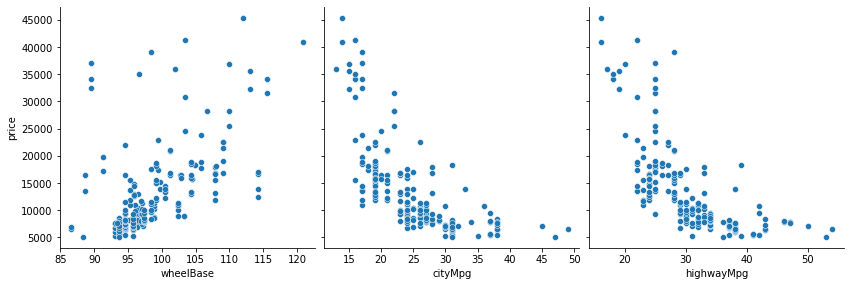

In [98]:
def pp(x,y,z):
    sns.pairplot(carDataSet, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('engineSize','bore', 'stroke')
pp('compressionRatio', 'horsepower', 'peakRpm')
pp('wheelBase', 'cityMpg', 'highwayMpg')

Engine size, bore ratio, horsepower, and wheelbase seem to be positively correlated with price. Citympg and highwaympg show a significant negative correlation with price.


In [99]:
np.corrcoef(carDataSet['length'], carDataSet['width'])[0, 1]

0.841118268481846

In [100]:
carDataSet['fuelEconomy'] = (carDataSet['cityMpg'] + carDataSet['highwayMpg'])/2

In [101]:
#Binning the Car Companies based on avg prices of each Company.
carDataSet['price'] = carDataSet['price'].astype('int')
temp = carDataSet.copy()
table = temp.groupby(['Brand'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='Brand')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
carDataSet['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
carDataSet.head()

,car_ID,Symboling,Brand,fuelType,aspiration,numOfDoors,bodyStyle,driveWheels,engineLocation,wheelBase,length,width,height,curbWeight,engineType,numOfCylinders,engineSize,fuelSystem,bore,stroke,compressionRatio,horsepower,peakRpm,cityMpg,highwayMpg,price,fuelEconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495,24.0,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500,24.0,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500,22.5,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950,27.0,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450,20.0,Medium


### Bivariate Analysis

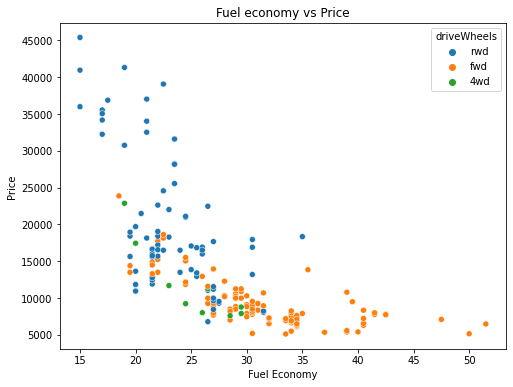

<Figure size 432x288 with 0 Axes>

In [102]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=carDataSet['fuelEconomy'],y=carDataSet['price'],hue=carDataSet['driveWheels'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

There is a significant negative correlation between fuel economy and price.


<Figure size 1800x432 with 0 Axes>

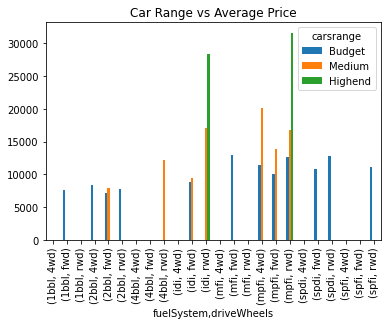

In [103]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(carDataSet.groupby(['fuelSystem','driveWheels','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

In [104]:
cars_lr = carDataSet[['price', 'fuelType', 'aspiration','bodyStyle', 'driveWheels','wheelBase',
                  'curbWeight', 'engineType', 'numOfCylinders', 'engineSize', 'bore','horsepower', 
                    'fuelEconomy', 'length','width', 'carsrange']]
cars_lr.head()

,price,fuelType,aspiration,bodyStyle,driveWheels,wheelBase,curbWeight,engineType,numOfCylinders,engineSize,bore,horsepower,fuelEconomy,length,width,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548.0,dohc,four,130,3.47,111.0,24.0,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548.0,dohc,four,130,3.47,111.0,24.0,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823.0,ohcv,six,152,2.68,154.0,22.5,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337.0,ohc,four,109,3.19,102.0,27.0,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824.0,ohc,five,136,3.19,115.0,20.0,176.6,66.4,Medium


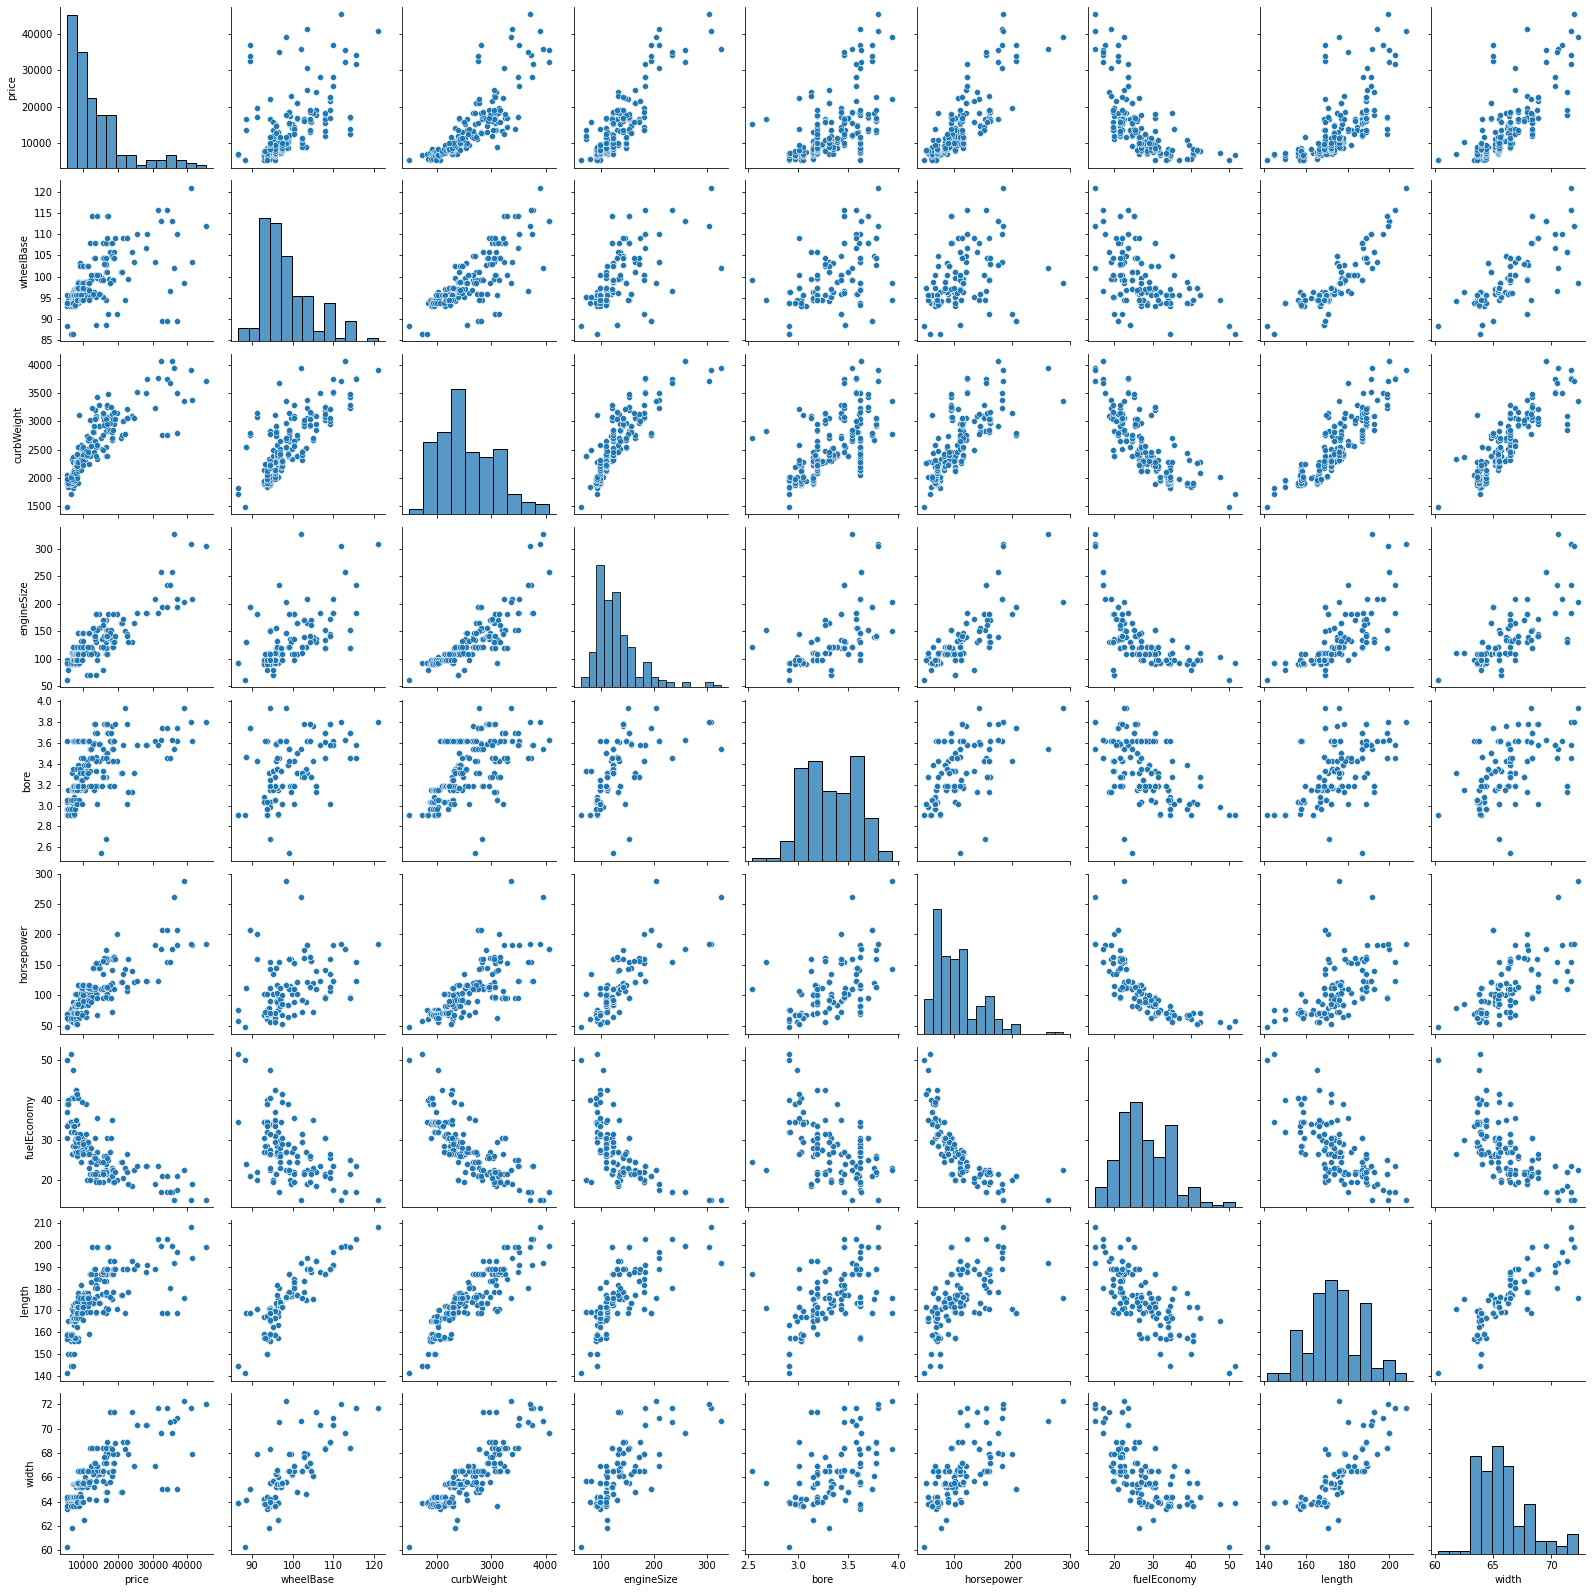

In [105]:
sns.pairplot(cars_lr)
plt.show()

In [106]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('fuelType',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('bodyStyle',cars_lr)
cars_lr = dummies('driveWheels',cars_lr)
cars_lr = dummies('engineType',cars_lr)
cars_lr = dummies('numOfCylinders',cars_lr)
cars_lr = dummies('carsrange',cars_lr)

In [107]:
cars_lr.head()

,price,wheelBase,curbWeight,engineSize,bore,horsepower,fuelEconomy,length,width,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548.0,130,3.47,111.0,24.0,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548.0,130,3.47,111.0,24.0,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823.0,152,2.68,154.0,22.5,171.2,65.5,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337.0,109,3.19,102.0,27.0,176.6,66.2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824.0,136,3.19,115.0,20.0,176.6,66.4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [108]:
cars_lr.shape

(205, 31)

### Train-Test Split and feature scaling

In [109]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [110]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelBase', 'curbWeight', 'engineSize', 'bore', 'horsepower','fuelEconomy','length','width','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [111]:
df_train.head()

,price,wheelBase,curbWeight,engineSize,bore,horsepower,fuelEconomy,length,width,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.534247,0.426016,0.291667,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.219178,0.452033,0.666667,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.342466,0.448780,0.308333,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.246575,0.450407,0.316667,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.123288,0.775610,0.575000,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [112]:
df_train.describe()

,price,wheelBase,curbWeight,engineSize,bore,horsepower,fuelEconomy,length,width,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.221323,0.411141,0.407878,0.241351,0.497941,0.228133,0.359805,0.525476,0.461655,0.909091,0.181818,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.221032,0.205581,0.211269,0.154619,0.207140,0.165395,0.186087,0.204848,0.184517,0.288490,0.387050,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.065282,0.272414,0.245539,0.135849,0.305556,0.091667,0.205479,0.399187,0.304167,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.195833,0.342466,0.502439,0.425000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.513699,0.669919,0.550000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


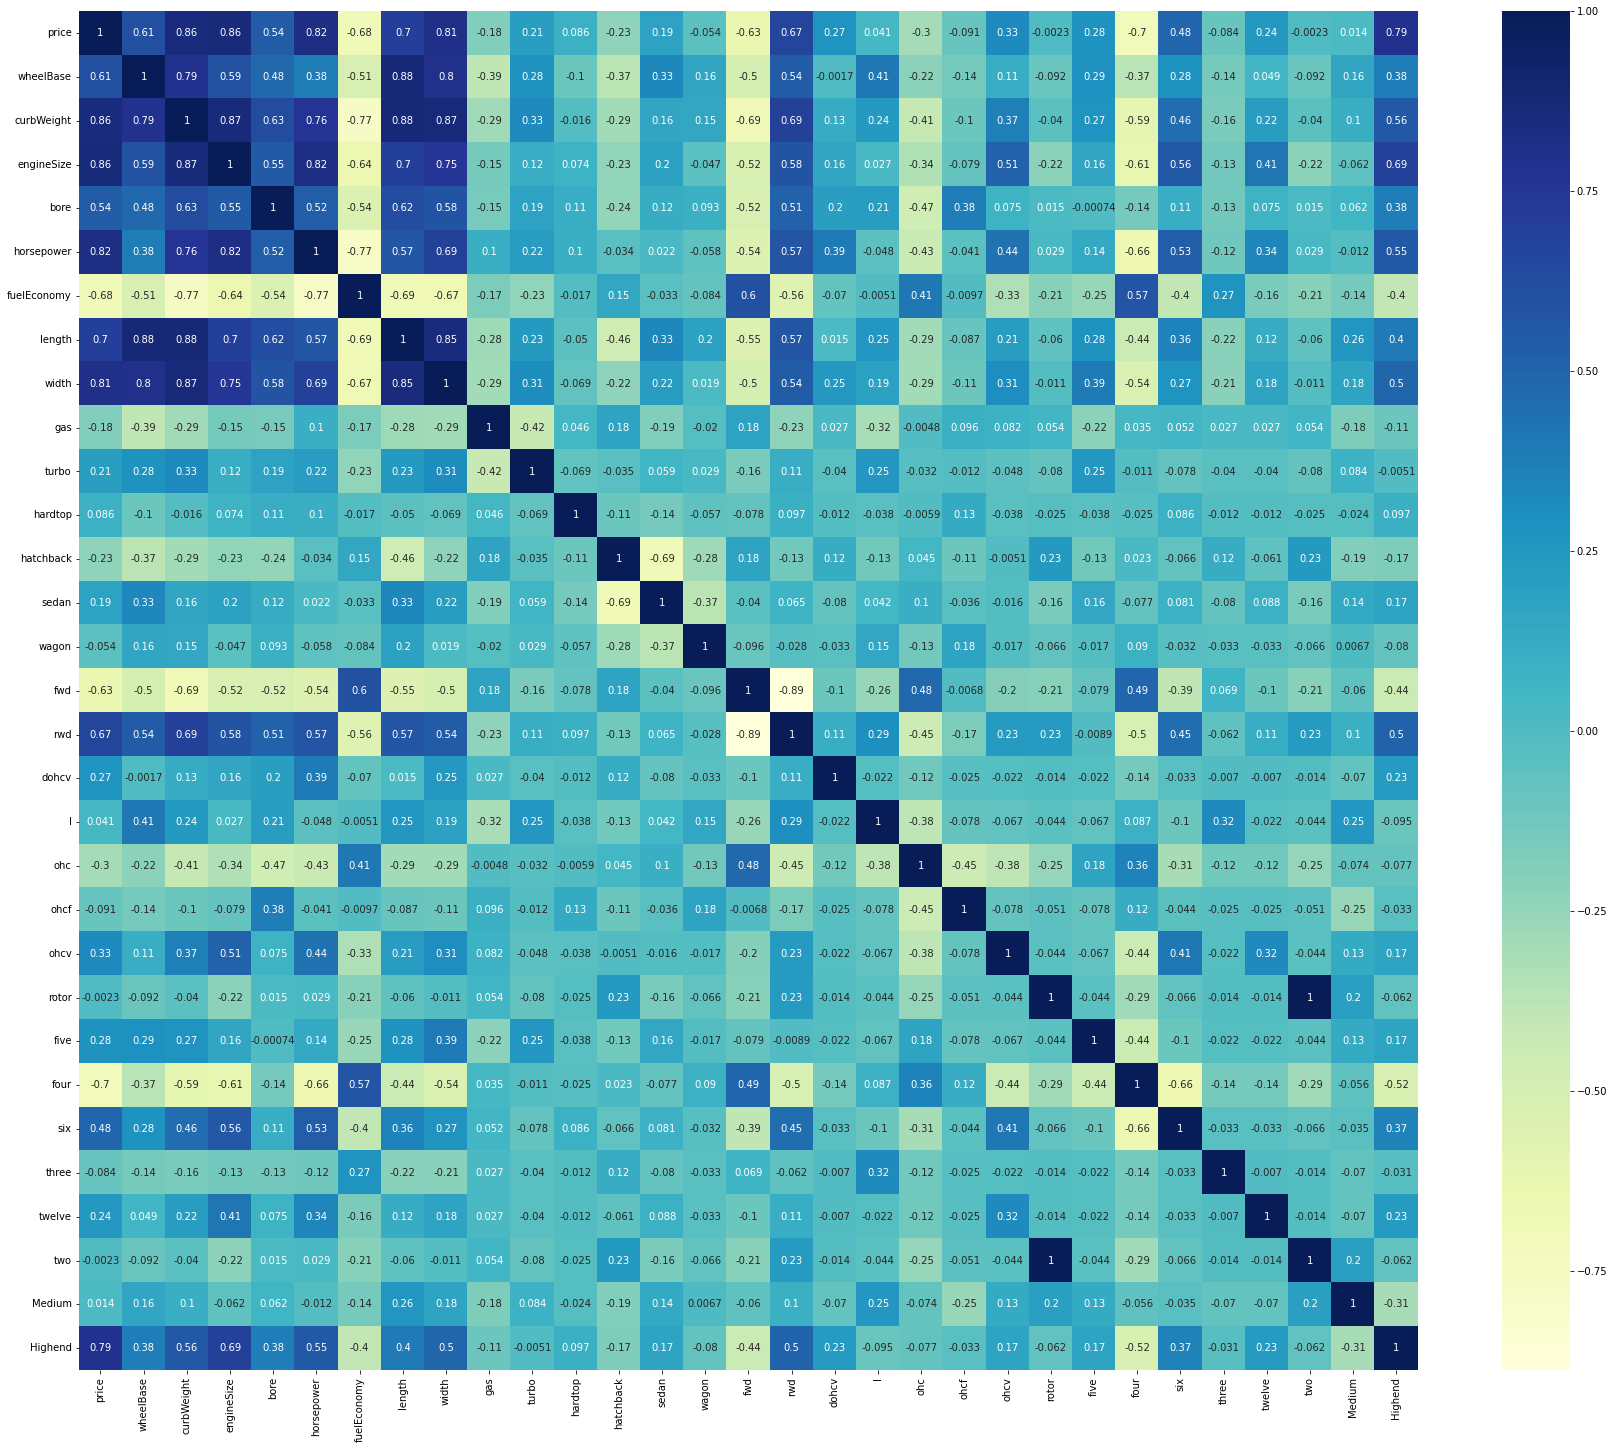

In [113]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Curbweight, engine size, horsepower, car width, and highend are highly correlated to price.

In [114]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

### Model Building

In [115]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [116]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [117]:
X_train.columns[rfe.support_]

Index(['wheelBase', 'curbWeight', 'horsepower', 'fuelEconomy', 'width',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv', 'five', 'four',
       'six', 'twelve', 'Highend'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [118]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,wheelBase,curbWeight,horsepower,fuelEconomy,width,hardtop,hatchback,sedan,wagon,dohcv,five,four,six,twelve,Highend
122,0.244828,0.272692,0.083333,0.534247,0.291667,0,0,1,0,0,0,1,0,0,0
125,0.272414,0.500388,0.395833,0.219178,0.666667,0,1,0,0,0,0,1,0,0,1
166,0.272414,0.314973,0.266667,0.342466,0.308333,0,1,0,0,0,0,1,0,0,0
1,0.068966,0.411171,0.262500,0.246575,0.316667,0,0,0,0,0,0,1,0,0,0
199,0.610345,0.647401,0.475000,0.123288,0.575000,0,0,0,1,0,0,1,0,0,0


In [119]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [120]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     126.9
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           9.67e-69
Time:                        03:03:11   Log-Likelihood:                 211.63
No. Observations:                 143   AIC:                            -391.3
Df Residuals:                     127   BIC:                            -343.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0089      0.051      0.175      

In [121]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

#### MODEL 2

In [122]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     133.3
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           4.19e-69
Time:                        03:03:11   Log-Likelihood:                 209.78
No. Observations:                 143   AIC:                            -389.6
Df Residuals:                     128   BIC:                            -345.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0274      0.050      0.544      

In [123]:
X_train_new = X_train_new.drop(["fuelEconomy"], axis = 1)

#### MODEL 3

In [124]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     140.6
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           1.93e-69
Time:                        03:03:11   Log-Likelihood:                 207.85
No. Observations:                 143   AIC:                            -387.7
Df Residuals:                     129   BIC:                            -346.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0733      0.044      1.653      0.1

In [125]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,79.36
7,sedan,13.03
2,curbWeight,12.59
6,hatchback,11.27
4,width,7.97
1,wheelBase,7.09
3,horsepower,6.60
8,wagon,6.39
11,four,4.68
12,six,3.47


dropping `curbweight` because of high VIF value. (shows that curbweight has high multicollinearity.)

In [126]:
X_train_new = X_train_new.drop(["curbWeight"], axis = 1)

#### MODEL 4


In [127]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     146.2
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           2.86e-69
Time:                        03:03:11   Log-Likelihood:                 204.61
No. Observations:                 143   AIC:                            -383.2
Df Residuals:                     130   BIC:                            -344.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1004      0.044      2.294      0.0

In [128]:
checkVIF(X_train_new)

,Features,VIF
0,const,74.42
6,sedan,11.26
5,hatchback,9.63
3,width,7.34
7,wagon,6.11
1,wheelBase,4.87
10,four,4.68
2,horsepower,4.23
11,six,3.46
9,five,2.26


In [129]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

#### MODEL 5

In [130]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     140.7
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           6.72e-67
Time:                        03:03:11   Log-Likelihood:                 195.80
No. Observations:                 143   AIC:                            -367.6
Df Residuals:                     131   BIC:                            -332.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0219      0.034     -0.640      0.5

In [131]:
checkVIF(X_train_new)

,Features,VIF
0,const,40.35
3,width,7.09
9,four,4.66
1,wheelBase,4.36
2,horsepower,4.22
10,six,3.43
8,five,2.22
11,Highend,1.69
7,dohcv,1.41
5,hatchback,1.35


### Residual Analysis of Model

In [132]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)
y_train_price

122    0.057669
125    0.541708
166    0.114848
1      0.131664
199    0.334070
         ...   
87     0.196958
103    0.356255
67     0.677469
24     0.025113
8      0.471400
Length: 143, dtype: float64

Text(0.5, 0, 'Errors')

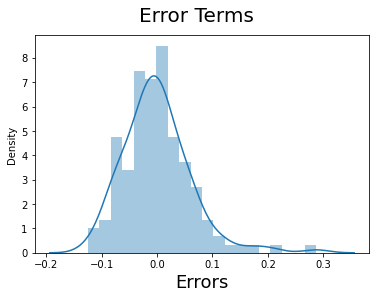

In [133]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

### Prediction and Evaluation

In [134]:
#Scaling the test set
num_vars = ['wheelBase', 'curbWeight', 'engineSize', 'bore', 'horsepower','fuelEconomy','length','width','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [135]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [136]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [137]:
# Making predictions
y_pred = lm.predict(X_test_new)

#### Evaluation of test via comparison of y_pred and y_test

In [138]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8369652490601912

Text(0, 0.5, 'y_pred')

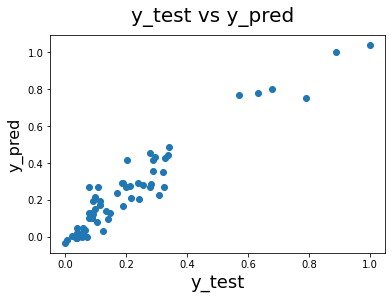

In [139]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

#### Evaluation of the model using Statistics

In [140]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     140.7
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           6.72e-67
Time:                        03:03:12   Log-Likelihood:                 195.80
No. Observations:                 143   AIC:                            -367.6
Df Residuals:                     131   BIC:                            -332.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0219      0.034     -0.640      0.5